
<center><h1>📍 📍 Most Watched 600 Youtube Videos 2024 Project 📍 📍</h1></center>


# About Dataset
##Overview
This curated collection encompasses 598 of the most engaging and widely viewed YouTube 
videos from the early months of 2024, capturing a diverse snapshot of digital culture and trends. 
- This dataset not only reflects the dynamic landscape of online content but also serves as a lens 
through which to explore the intricacies of viewer engagement and content popularity on a global 
scale.


# Predictive Modeling:
Use engagement metrics to predict future trends or the potential 
virality of content types

## Data Dictionary
The dataset comprises the following columns, each offering unique insights:
- **Title**:-  The video's title, providing a glimpse into the content and themes.
- **Published At:** - Timestamp indicating the video's release date, useful for temporal 
analysis.
- **Duration:** - The length of the video, offering context on content depth and viewer 
commitment.
- **View Count:**- The total number of views, a direct metric of popularity and reach.
- **Like Count:** - Reflecting viewer approval and engagement.
- **Comment Count:** - Indicative of viewer interaction and discussion sparked by the video.

# Basic work 

### Load Libraries

In [1]:
# Importing the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline 

### Importing the data

In [2]:
#Reading the data set
data=pd.read_csv('most_watched_600_youtube_videos_2024.csv')

In [3]:
# Display the first few rows of the dataframe
data.head(6)

,title,published_at,duration,view_count,like_count,comment_count
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27T19:16:13Z,PT25S,39972377,1143891.0,8254.0
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11T14:43:07Z,PT37S,37983493,1239925.0,2823.0
2,Majburi Insaan Se Kuch Bhi Karva Deti Hai | PA...,2024-01-24T05:17:00Z,PT1M1S,29605580,938530.0,691.0
3,Tom 🍓 Jerry (Soumya&Ammu)Real End Twist😍🎈 #sho...,2024-01-17T14:14:43Z,PT58S,22825107,438667.0,241.0
4,The success of people depends on their life co...,2024-01-24T09:00:30Z,PT56S,21029074,348898.0,1500.0
5,ARE YOU NORMAL OR …? #shorts,2024-02-08T21:07:37Z,PT1M1S,17993330,1269873.0,7280.0


In [4]:
data.tail()

,title,published_at,duration,view_count,like_count,comment_count
593,కేసీఆర్ ఏం చేయబోతున్నడు..ముందే చెప్పేసిన మల్లన...,2024-02-20T06:23:10Z,PT7M14S,109855,1969.0,257.0
594,The BEST feeling in the World!! I know I’ll mi...,2024-02-19T18:12:55Z,PT7S,54557,4659.0,132.0
595,Chinese burger with chicken and bamboo shoots ...,2024-02-20T03:16:24Z,PT59S,63345,7631.0,110.0
596,"АЛЁНА, БЛИН про Ксению Собчак и Дину Саеву / ...",2024-02-19T20:04:58Z,PT58S,52786,1549.0,33.0
597,Week 15 living off homegrown and wild food! 🙂 ...,2024-02-19T17:04:55Z,PT58S,49143,6287.0,64.0


### File Structure and Content

In [5]:
print(' We have {} Rows.'.format(data.shape[0]))
print(' We have {} Columns.'.format(data.shape[1]))

 We have 598 Rows.
 We have 6 Columns.


In [6]:
# Summary statistics
data.describe()

,view_count,like_count,comment_count
count,5.980000e+02,5.850000e+02,588.000000
mean,1.888822e+06,6.561655e+04,606.583333
std,3.953096e+06,1.430048e+05,1389.562006
min,4.914300e+04,4.700000e+01,0.000000
25%,1.757130e+05,6.690000e+03,65.000000
50%,5.476450e+05,1.629800e+04,181.500000
75%,1.009198e+06,5.467300e+04,492.500000
max,3.997238e+07,1.269873e+06,11924.000000


# Exploratory Data Analysis [ EDA]

# Variable Identification

In [7]:
# Varaible Identification means if you want more information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          598 non-null    object 
 1   published_at   598 non-null    object 
 2   duration       598 non-null    object 
 3   view_count     598 non-null    int64  
 4   like_count     585 non-null    float64
 5   comment_count  588 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 28.2+ KB


In [8]:
# Checkoing the datatypes 
data.dtypes

title             object
published_at      object
duration          object
view_count         int64
like_count       float64
comment_count    float64
dtype: object

### Integer  Data Type

In [9]:
# identifiaction int data tpye
data.dtypes[data.dtypes == 'int64']

view_count    int64
dtype: object

### Float Data Type

In [10]:
# identifiaction int data tpye

data.dtypes[data.dtypes == 'float64']

like_count       float64
comment_count    float64
dtype: object

### Object Data Type

In [11]:
# identifiaction int data tpye

data.dtypes[data.dtypes == 'object']

title           object
published_at    object
duration        object
dtype: object

In [12]:
# Separating the Categorical Variables 
Categorical_cols = ['title', 'published_at', 'duration']

In [13]:
# Number of Unique values
data[Categorical_cols].nunique()

title           479
published_at    478
duration        191
dtype: int64

In [14]:
# Convert 'published_at' column to Timestamp
data['published_at'] = pd.to_datetime(data['published_at'])

data.dtypes

title                         object
published_at     datetime64[ns, UTC]
duration                      object
view_count                     int64
like_count                   float64
comment_count                float64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'title' column
data['title_encoded'] = label_encoder.fit_transform(data['title'])

# Display the encoded titles
print(data[['title', 'title_encoded']].head())


                                               title  title_encoded
0             Se Libró del ATAQUE de un Cocodrilo ❌🐊            276
1  #Sareedrapping#pregnancydrapping#babyshower#sh...             11
2  Majburi Insaan Se Kuch Bhi Karva Deti Hai | PA...            197
3  Tom 🍓 Jerry (Soumya&Ammu)Real End Twist😍🎈 #sho...            314
4  The success of people depends on their life co...            307


# Handling Missing Value  

In [16]:
# Check for missing values
data.isna().sum()

title             0
published_at      0
duration          0
view_count        0
like_count       13
comment_count    10
title_encoded     0
dtype: int64

In [17]:
# imputing the missing Vaklues Using Impute function
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data[['view_count', 'like_count', 'comment_count']] = imputer.fit_transform(data[['view_count', 'like_count', 'comment_count']])

# Verify that missing values have been imputed
missing_values_imputed = data.isnull().sum()
print(missing_values_imputed)

title            0
published_at     0
duration         0
view_count       0
like_count       0
comment_count    0
title_encoded    0
dtype: int64


In [18]:
data.head(15)

,title,published_at,duration,view_count,like_count,comment_count,title_encoded
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27 19:16:13+00:00,PT25S,39972377.0,1.143891e+06,8254.0,276
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11 14:43:07+00:00,PT37S,37983493.0,1.239925e+06,2823.0,11
2,Majburi Insaan Se Kuch Bhi Karva Deti Hai | PA...,2024-01-24 05:17:00+00:00,PT1M1S,29605580.0,9.385300e+05,691.0,197
3,Tom 🍓 Jerry (Soumya&Ammu)Real End Twist😍🎈 #sho...,2024-01-17 14:14:43+00:00,PT58S,22825107.0,4.386670e+05,241.0,314
4,The success of people depends on their life co...,2024-01-24 09:00:30+00:00,PT56S,21029074.0,3.488980e+05,1500.0,307
5,ARE YOU NORMAL OR …? #shorts,2024-02-08 21:07:37+00:00,PT1M1S,17993330.0,1.269873e+06,7280.0,27
6,Süper ❤️ Smart family 🤣💕🎥 #shorts,2024-02-10 10:12:45+00:00,PT57S,18027624.0,2.861900e+05,442.0,295
7,Bro didn't even hesitate 🥶 #shorts #sidemen #v...,2024-01-30 19:00:18+00:00,PT22S,17421206.0,1.013966e+06,2256.0,61
8,CHAD WEIGHT IS FIX 🗿 #mrbombastic #shorts,2024-01-20 12:00:41+00:00,PT6S,15366570.0,6.561655e+04,879.0,64
9,Amazing! Giant Watermelon Juice - Fruit Cuttin...,2024-02-09 04:27:45+00:00,PT47S,14168088.0,3.367040e+05,763.0,38


# UNIVARIATE ANALYSIS

- **Unvariate Analayse means to analyse single variable.**-
- **Unvariate involves like central tendecies, distrubutions and spread of data**-
- **when we talk about central tendencies we wanna to know the mean,mode and median of data, range of data, avrage of data.**-
- **also when we talk about spread of data we are talking Standard divation and variance divation of data also range of data.**-

In [19]:
data.describe()

,view_count,like_count,comment_count,title_encoded
count,5.980000e+02,5.980000e+02,598.000000,598.000000
mean,1.888822e+06,6.561655e+04,606.583333,235.695652
std,3.953096e+06,1.414392e+05,1377.874985,136.988798
min,4.914300e+04,4.700000e+01,0.000000,0.000000
25%,1.757130e+05,6.818500e+03,66.000000,120.250000
50%,5.476450e+05,1.720550e+04,191.000000,227.500000
75%,1.009198e+06,5.683775e+04,527.000000,356.750000
max,3.997238e+07,1.269873e+06,11924.000000,478.000000


In [20]:
# mean Of Data

print(data['view_count'].mean())

1888821.525083612


### Median

In [21]:
# Median Of Data
print(data['view_count'].median())

547645.0


### Min Observation

In [22]:
# minimum of Data
data[data['view_count'] == data['view_count'].min()] 

,title,published_at,duration,view_count,like_count,comment_count,title_encoded
597,Week 15 living off homegrown and wild food! 🙂 ...,2024-02-19 17:04:55+00:00,PT58S,49143.0,6287.0,64.0,324


### Max Observation

In [23]:
# Maximum Of data 
data[data['view_count'] == data['view_count'].max()]        

,title,published_at,duration,view_count,like_count,comment_count,title_encoded
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27 19:16:13+00:00,PT25S,39972377.0,1143891.0,8254.0,276


### Range 

In [24]:
# Range Of Data
print(data['view_count'].min(), data['view_count'].max())

49143.0 39972377.0


### Max, Min, Range for each column

In [25]:
# Printing Max of evey numerical column
numerical_cols = ['view_count', 'like_count', 'comment_count', 'title_encoded']
data[numerical_cols].max()

view_count       39972377.0
like_count        1269873.0
comment_count       11924.0
title_encoded         478.0
dtype: float64

In [26]:
data[numerical_cols].min()

view_count       49143.0
like_count          47.0
comment_count        0.0
title_encoded        0.0
dtype: float64

### Standard Deviation and Variance

In [27]:
# Spread Of data are calssified into two standartd and varience 

print(data['view_count'].std())
print(data['view_count'].var())

3953095.8116930434
15626966496425.082


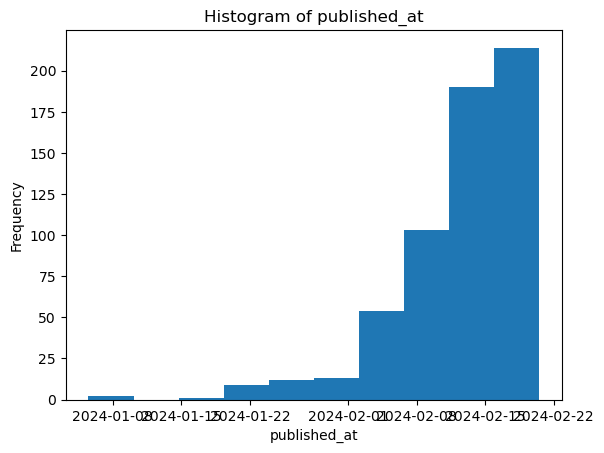

In [28]:
# Visualization (Histogram of published_at) Is a part EDA
import matplotlib.pyplot as plt

plt.hist(data['published_at'], bins=10,)
plt.xlabel('published_at')
plt.ylabel('Frequency')
plt.title('Histogram of published_at')
plt.show()

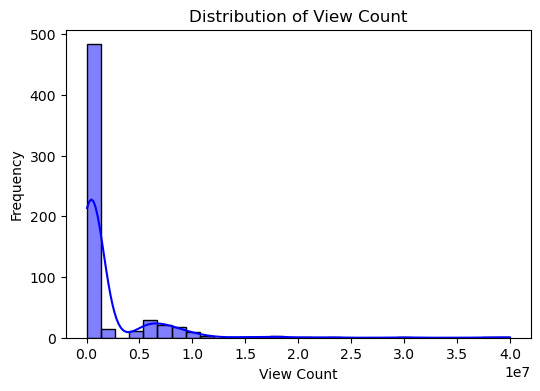

In [29]:
# Histogram for view_count
plt.figure(figsize=(6, 4))
sns.histplot(data['view_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of View Count')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()

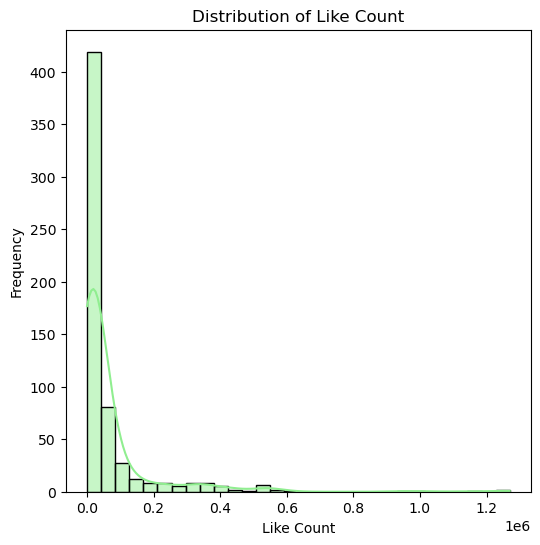

In [30]:
# Histogram for 'like_count'
plt.figure(figsize=(6, 6))
sns.histplot(data['like_count'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Like Count')
plt.xlabel('Like Count')
plt.ylabel('Frequency')
plt.show()

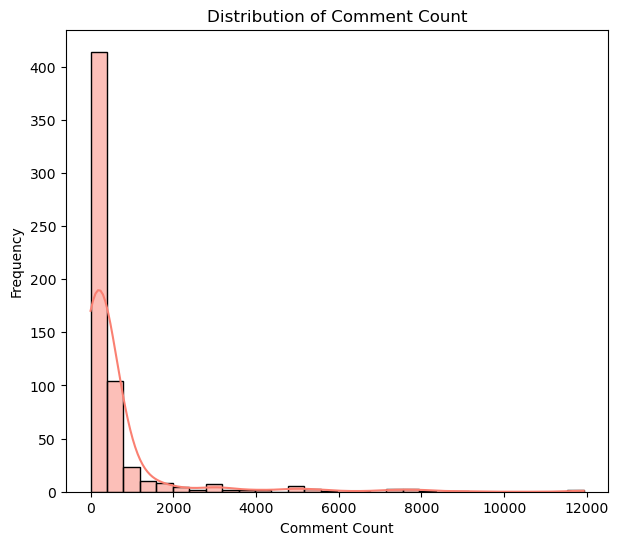

In [31]:
# Histogram for 'comment_count'
plt.figure(figsize=(7, 6))
sns.histplot(data['comment_count'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Comment Count')
plt.xlabel('Comment Count')
plt.ylabel('Frequency')
plt.show()

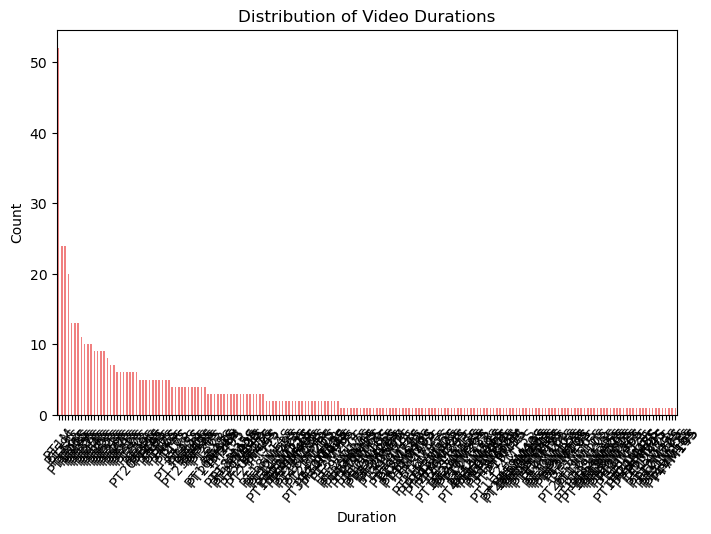

In [32]:
# Bar plot for duration
plt.figure(figsize=(8, 5))
data['duration'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Video Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

<Axes: xlabel='duration', ylabel='Count'>

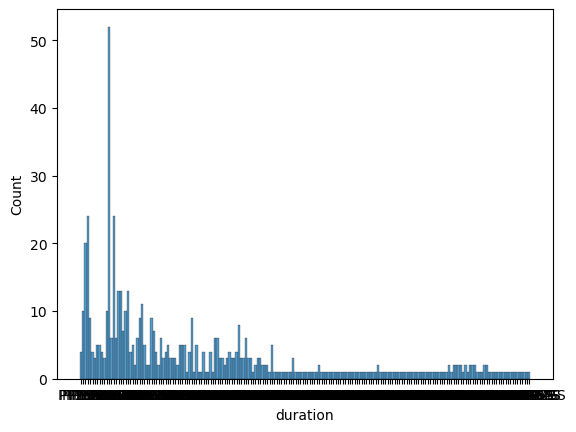

In [33]:
sns.histplot(data['duration'],kde=False,bins=20)

# BIVARIATE ANALYSIS

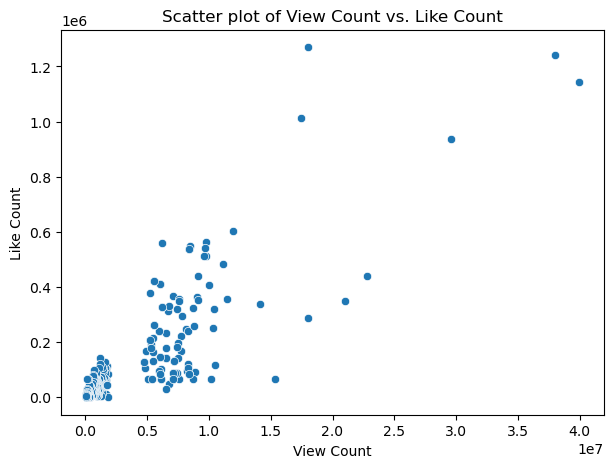

In [34]:
# Scatter plot between 'view_count' and 'like_count'
plt.figure(figsize=(7, 5))
sns.scatterplot(x='view_count', y='like_count', data=data)
plt.title('Scatter plot of View Count vs. Like Count')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.show()

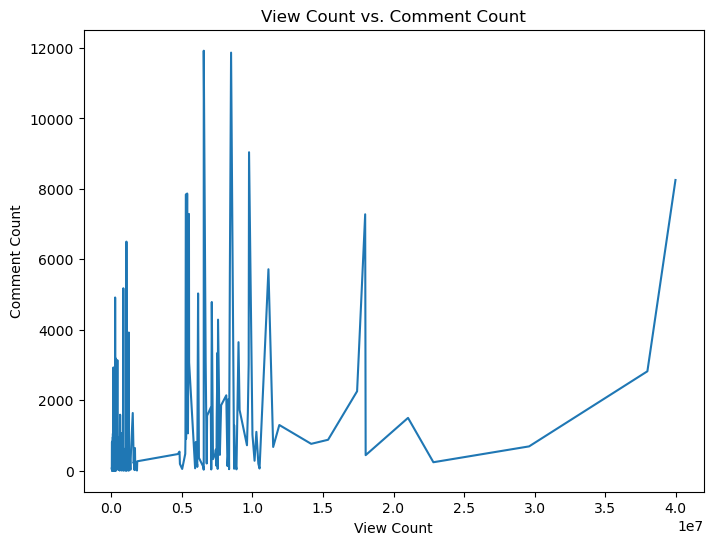

In [35]:
# Scatter plot between 'view_count' and 'comment_count'
plt.figure(figsize=(8, 6))
sns.lineplot(x='view_count', y='comment_count', data=data)
plt.title('View Count vs. Comment Count')
plt.xlabel('View Count')
plt.ylabel('Comment Count')
plt.show()

In [36]:
# Correlation matrix
corr_matrix = data[['published_at', 'view_count', 'like_count', 'comment_count']].corr()

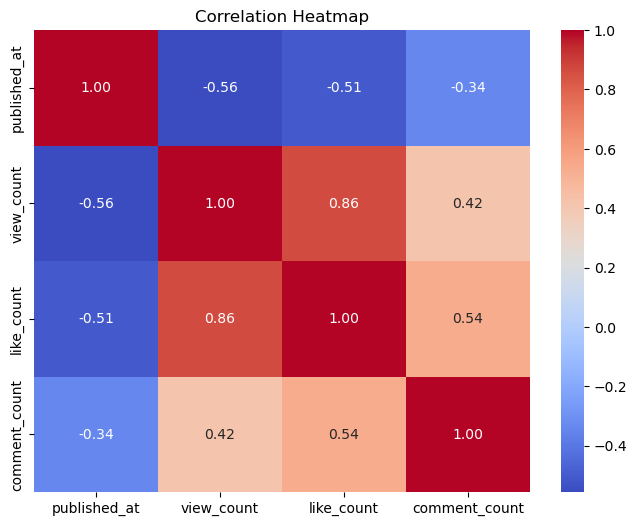

In [37]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Outlier Treatment

In [38]:
data.describe()

,view_count,like_count,comment_count,title_encoded
count,5.980000e+02,5.980000e+02,598.000000,598.000000
mean,1.888822e+06,6.561655e+04,606.583333,235.695652
std,3.953096e+06,1.414392e+05,1377.874985,136.988798
min,4.914300e+04,4.700000e+01,0.000000,0.000000
25%,1.757130e+05,6.818500e+03,66.000000,120.250000
50%,5.476450e+05,1.720550e+04,191.000000,227.500000
75%,1.009198e+06,5.683775e+04,527.000000,356.750000
max,3.997238e+07,1.269873e+06,11924.000000,478.000000


In [39]:
data['comment_count'].quantile(0.25), data['comment_count'].quantile(0.75)

(66.0, 527.0)

In [40]:
IQR=data['comment_count'].quantile(0.75) - data['comment_count'].quantile(0.25)
IQR

461.0

In [41]:
Q1= data['comment_count'].quantile(0.25)
Q2=data['comment_count'].quantile(0.75)
whisker_1=Q1-(1.5*IQR)
whisker_2=Q2 + (1.5*IQR)

whisker_1, whisker_2

(-625.5, 1218.5)

In [42]:
# data.loc[data['comment_count']<66]

In [43]:
data_new = data.loc[data['comment_count']<66]
data.shape, data_new.shape

((598, 7), (149, 7))

## Replacing Outliers

In [44]:
data['comment_count'].loc[data['comment_count']<7]

110    5.0
129    1.0
137    0.0
148    2.0
150    2.0
190    4.0
193    5.0
215    5.0
378    0.0
417    4.0
429    5.0
447    5.0
455    5.0
471    0.0
473    2.0
511    0.0
525    6.0
535    0.0
548    4.0
550    6.0
569    0.0
571    4.0
589    6.0
Name: comment_count, dtype: float64

In [45]:
data['comment_count'].loc[data['comment_count']<7]

110    5.0
129    1.0
137    0.0
148    2.0
150    2.0
190    4.0
193    5.0
215    5.0
378    0.0
417    4.0
429    5.0
447    5.0
455    5.0
471    0.0
473    2.0
511    0.0
525    6.0
535    0.0
548    4.0
550    6.0
569    0.0
571    4.0
589    6.0
Name: comment_count, dtype: float64

In [46]:
data['comment_count'][589]

6.0

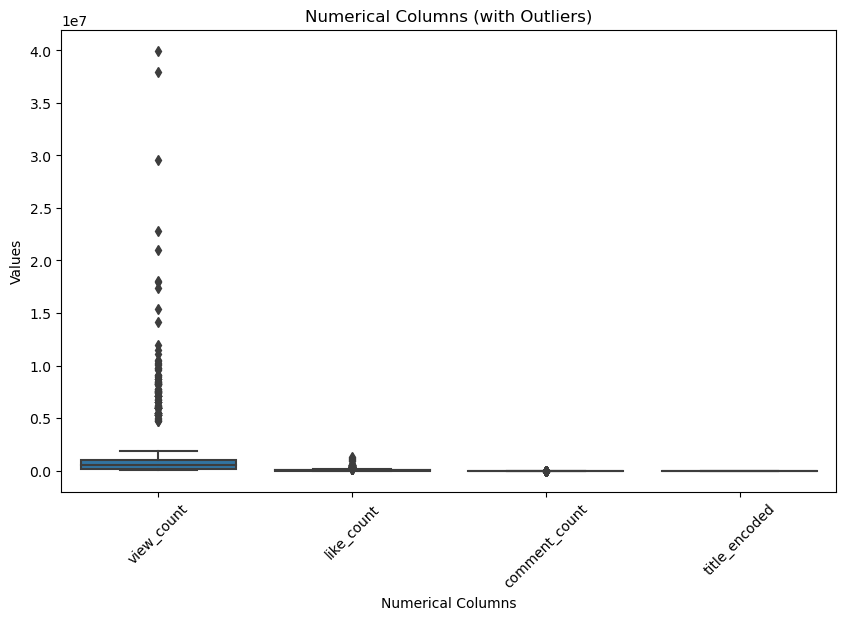

In [47]:
# Define the numerical columns for outlier visualization
numerical_cols = ['view_count', 'like_count', 'comment_count', 'title_encoded']

# Create box plots for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_cols])
# set title
plt.title('Numerical Columns (with Outliers)')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Feature Engineering

#### Datetime Features:

Extract features from the 'published_at' column:
Extract the year, month, and day as separate features.
Calculate the day of the week or time of day when the video was published.

In [48]:
data['published_at'] = pd.to_datetime(data['published_at'])
data['publish_year'] = data['published_at'].dt.year
data['publish_month'] = data['published_at'].dt.month
data['publish_day'] = data['published_at'].dt.day
data['publish_day_of_week'] = data['published_at'].dt.dayofweek

In [49]:
data.head()

,title,published_at,duration,view_count,like_count,comment_count,title_encoded,publish_year,publish_month,publish_day,publish_day_of_week
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27 19:16:13+00:00,PT25S,39972377.0,1143891.0,8254.0,276,2024,1,27,5
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11 14:43:07+00:00,PT37S,37983493.0,1239925.0,2823.0,11,2024,2,11,6
2,Majburi Insaan Se Kuch Bhi Karva Deti Hai | PA...,2024-01-24 05:17:00+00:00,PT1M1S,29605580.0,938530.0,691.0,197,2024,1,24,2
3,Tom 🍓 Jerry (Soumya&Ammu)Real End Twist😍🎈 #sho...,2024-01-17 14:14:43+00:00,PT58S,22825107.0,438667.0,241.0,314,2024,1,17,2
4,The success of people depends on their life co...,2024-01-24 09:00:30+00:00,PT56S,21029074.0,348898.0,1500.0,307,2024,1,24,2


#### Duration in Seconds:


In [50]:
import re

def duration_to_seconds(duration):
    # Regular expression to extract hours, minutes, and seconds
    pattern = re.compile(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?')
    
    # Attempt to match the pattern in the duration string
    match = pattern.match(duration)
    
    if match:
        # Extract hours, minutes, and seconds from the matched groups
        hours, minutes, seconds = map(int, match.groups(default='0'))
        
        # Convert to total seconds
        total_seconds = hours * 3600 + minutes * 60 + seconds
        return total_seconds
    else:
        # Return a default value or handle the case where the pattern doesn't match
        return None

# Example usage:
duration_str = 'PT1H30M15S'
seconds = duration_to_seconds(duration_str)
print(seconds)  # Output: 5415 seconds


5415


In [51]:
data['duration_seconds'] = data['duration'].apply(lambda x: duration_to_seconds(x))

In [52]:
data.head()

,title,published_at,duration,view_count,like_count,comment_count,title_encoded,publish_year,publish_month,publish_day,publish_day_of_week,duration_seconds
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27 19:16:13+00:00,PT25S,39972377.0,1143891.0,8254.0,276,2024,1,27,5,25.0
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11 14:43:07+00:00,PT37S,37983493.0,1239925.0,2823.0,11,2024,2,11,6,37.0
2,Majburi Insaan Se Kuch Bhi Karva Deti Hai | PA...,2024-01-24 05:17:00+00:00,PT1M1S,29605580.0,938530.0,691.0,197,2024,1,24,2,61.0
3,Tom 🍓 Jerry (Soumya&Ammu)Real End Twist😍🎈 #sho...,2024-01-17 14:14:43+00:00,PT58S,22825107.0,438667.0,241.0,314,2024,1,17,2,58.0
4,The success of people depends on their life co...,2024-01-24 09:00:30+00:00,PT56S,21029074.0,348898.0,1500.0,307,2024,1,24,2,56.0


In [53]:
# the engagement rate by dividing 'like_count' or 'comment_count' by 'view_count'.
data['engagement_rate'] = data['like_count'] / data['view_count']

In [54]:
data.head(2)

,title,published_at,duration,view_count,like_count,comment_count,title_encoded,publish_year,publish_month,publish_day,publish_day_of_week,duration_seconds,engagement_rate
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27 19:16:13+00:00,PT25S,39972377.0,1143891.0,8254.0,276,2024,1,27,5,25.0,0.028617
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11 14:43:07+00:00,PT37S,37983493.0,1239925.0,2823.0,11,2024,2,11,6,37.0,0.032644


In [55]:
#Video Title Length:
#Add a feature indicating the length of the video title.
data['title_length'] = data['title'].apply(lambda x: len(x))

In [56]:
data.head(2)

,title,published_at,duration,view_count,like_count,comment_count,title_encoded,publish_year,publish_month,publish_day,publish_day_of_week,duration_seconds,engagement_rate,title_length
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27 19:16:13+00:00,PT25S,39972377.0,1143891.0,8254.0,276,2024,1,27,5,25.0,0.028617,38
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11 14:43:07+00:00,PT37S,37983493.0,1239925.0,2823.0,11,2024,2,11,6,37.0,0.032644,61


In [57]:
#Hashtags Count:
#Count the number of hashtags in the video title.
data['hashtags_count'] = data['title'].apply(lambda x: x.count('#'))

In [58]:
data.head(2)

,title,published_at,duration,view_count,like_count,comment_count,title_encoded,publish_year,publish_month,publish_day,publish_day_of_week,duration_seconds,engagement_rate,title_length,hashtags_count
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27 19:16:13+00:00,PT25S,39972377.0,1143891.0,8254.0,276,2024,1,27,5,25.0,0.028617,38,0
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11 14:43:07+00:00,PT37S,37983493.0,1239925.0,2823.0,11,2024,2,11,6,37.0,0.032644,61,5


In [59]:
#data = pd.get_dummies(data, columns=['publish_day_of_week'], prefix='day_of_week', drop_first=True)

## Data Splitting

### Segregating variables: Independent and Dependent Variables

In [60]:
#seperating independent and dependent variables
x = data.drop(['view_count'], axis=1)
y = data['view_count']
x.shape, y.shape

((598, 14), (598,))

### Splitting the data into train set and the test set

In [61]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with feature columns and target variable
# Let's assume you want to predict 'view_count', so it will be your target variable (y)
X = data[['published_at', 'duration', 'like_count', 'comment_count']]
y = data['view_count']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (478, 4)
X_test shape: (120, 4)
y_train shape: (478,)
y_test shape: (120,)


## Model Selection

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [63]:
from sklearn.model_selection import train_test_split
# Assuming these are the features you want to use
X = data[['like_count', 'comment_count']]  
y = data['view_count']

In [64]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import mean_squared_error, r2_score
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

In [68]:
# Display the results
print("Mean Squared Error:", lr_mse)
print("R-squared:", lr_r2)

Mean Squared Error: 4635725727334.291
R-squared: 0.7083492531384997


In [69]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [70]:
# Initialize and train the Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [71]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [72]:
# Evaluate the model
dt_mse_1 = mean_squared_error(y_test, y_pred)
dt_r2_2 = r2_score(y_test, y_pred)

In [73]:
# Display the results
print("Mean Squared Error:", dt_mse_1)
print("R-squared:", dt_r2_2)

Mean Squared Error: 7832423500531.816
R-squared: 0.5072331069553495


In [74]:
from sklearn.ensemble import RandomForestRegressor
X = data[['like_count', 'comment_count']]  # Assuming these are the features you want to use
y = data['view_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(max_depth=2, random_state=100)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

In [76]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [77]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2) 

Mean Squared Error: 3489209242823.226
R-squared: 0.7804808693437051


##  Comparison  

In [78]:
# Linear Regrission 
lr_results=pd.DataFrame(['Linear Regression', lr_mse,lr_r2]).transpose()
lr_results.columns=['Method',  'Training R2',  'Test R2']
lr_results

,Method,Training R2,Test R2
0,Linear Regression,4635725727334.291016,0.708349


In [79]:
# Randome Forest
rf_result=pd.DataFrame(['Random Forest', mse,r2]).transpose()
rf_result.columns=['Method',  'Training R2',  'Test R2']
rf_result

,Method,Training R2,Test R2
0,Random Forest,3489209242823.226074,0.780481


In [80]:
# Randome Forest
dt_result=pd.DataFrame(['Decsion Tree', dt_mse_1,dt_r2_2]).transpose()
dt_result.columns=['Method',  'Training R2',  'Test R2']
dt_result

,Method,Training R2,Test R2
0,Decsion Tree,7832423500531.816406,0.507233


In [81]:
df_models=pd.concat([lr_results, rf_result, dt_result ], axis=0)
df_models

,Method,Training R2,Test R2
0,Linear Regression,4635725727334.291016,0.708349
0,Random Forest,3489209242823.226074,0.780481
0,Decsion Tree,7832423500531.816406,0.507233


In [82]:
# Create a DataFrame with R-squared scores
data = {
    'Method': ['Linear Regression', 'Random Forest', 'Decision Tree'],
    'Test R2': [0.708349, 0.780481, 0.64386]
}

Text(0.5, 1.0, 'Comparison of R-squared Scores')

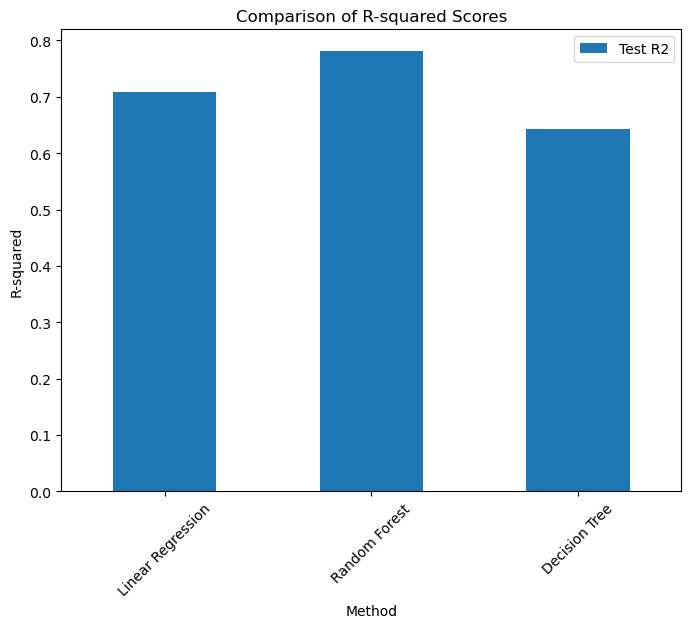

In [83]:
df = pd.DataFrame(data)
# Plot the R-squared scores
fig, ax = plt.subplots(figsize=(8, 6))
df.plot(x='Method', y=[ 'Test R2'], kind='bar', ax=ax)
ax.set_xticklabels(df['Method'], rotation=45)
ax.set_ylabel('R-squared')
ax.set_title('Comparison of R-squared Scores')